In [13]:
#!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-01-16 14:24:12 +00:00)


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits import mplot3d
from copy import copy
from scipy.linalg import solve_banded
%matplotlib inline

time: 0 ns (started: 2022-01-16 14:24:12 +00:00)


# **Ficha 4 - Exercício 4**
## Realizado pelos alunos da licenciatura em Engenharia Física, do turno de terça-feira:
### Maria Gabriela Oliveira, A92841;
### Miguel Caçador Peixoto, A92838;






#####  15 de novembro de 2021

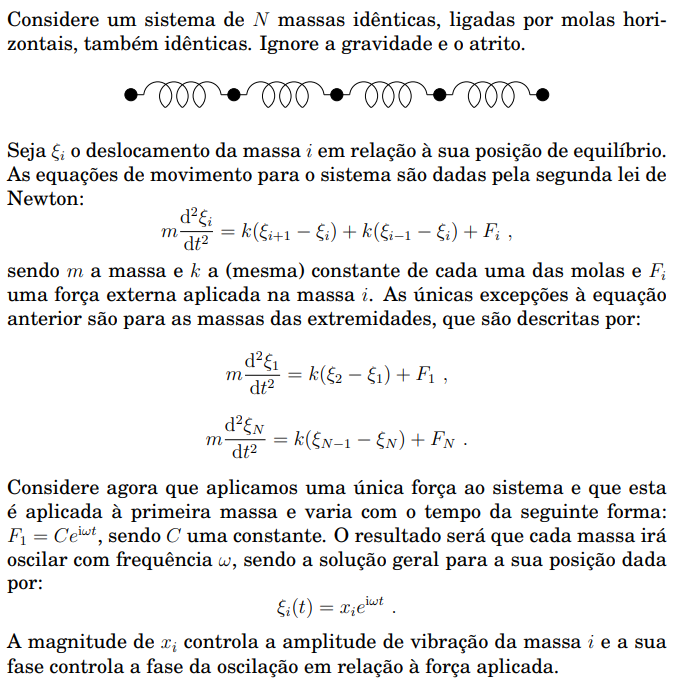

## Alínea a - Encontrar o sistema de equações que descreve o sistema.

Aplicando apenas uma força $F=Ce^{iwt}$ à 1º massa, tem-se o seguinte sistema de eqauações diferenciais:


\begin{cases}
 m \ddot \xi_1 = k(\xi_2-\xi_1) + Ce^{iwt}\\
 m \ddot \xi_N = k (\xi_{N-1}-\xi_N) \\ 
 m \ddot \xi_n = k(\xi_{n+1}-\xi_n) + k(\xi_{n-1} - \xi_n)
\end{cases}

Sendo que a primeira linha diz respeito à 1º massa, onde a força é aplicada, a segunda linha à última massa e, finalmente, a terceira linha às restantes massas.

Admitindo que a solução geral para a posição de cada oscilador é:

\begin{align}
\xi_{i}(t) = x_i e^{iwt},
\end{align}
substituíndo no sistema de equações:

\begin{cases}
m (iw)^2x_1 e^{iwt} = k(x_2 e^{iwt}-x_1 e^{iwt}) + Ce^{iwt}\\
 m (iw)^2 x_N e^{iwt} = k (x_{N-1} e^{iwt}-x_Ne^{iwt}) \\ 
 m (iw)^2x_n e^{iwt} = k(x_{n+1} e^{iwt}-x_n e^{iwt}) + k(x_{n-1} e^{iwt} - x_n e^{iwt})
\end{cases}

Simplificando:
\begin{cases}
 -m x_1 w^2= k(x_2-x_1) + C\\
 -m x_N w^2= k (x_{N-1}-x_N) \\ 
 -m x_n w^2= k(x_{n+1}-x_n) + k(x_{n-1} - x_n)
\end{cases}
\begin{align}
\Leftrightarrow
\end{align}
\begin{cases}
 -x_2k+x_1k-x_1mw^2=C \\
 -x_{N-1}k-x_Nk-mx_Nw^2=0 \\ 
 -kx_{n+1} + 2kx_n-kx_{n-1}-mx_nw^2=0
\end{cases}

Finalmente, usando como mudança de variavel $\alpha=2k-mw^2$ obtém-se:    
\begin{cases}
  (\alpha-k)x_1 -x_2k=C\\
  (\alpha-k)x_N-x_{N-1}k=0\\
  \alpha x_n -x_{n-1}k-x_{n+1}k=0
\end{cases}

## Alínea b - Resolução do sistema apenas por eliminação.

Comecemos por definir o sistema na sua forma matricial

In [15]:
def definir_sistema(N=26, C=1, m=1, k=6, w=2):
  # alpha
  a=2*k-m*w**2
  # Construção da matriz solução
  solucao=np.empty([N],dtype=np.float64)
  solucao[0]=C
  for i in range(1,N):
    solucao[i]=0

  ## Construção matriz do sistema
  # Inicializar a zeros
  matriz=np.zeros([N,N],dtype=np.float64)

  # Primeira massa
  matriz[0][0]=a-k
  matriz[0][1]=-k

  # Ultima massa
  matriz[-1][-1]=a-k
  matriz[-1][-2]=-k

  # Massas restantes
  for i in range(1,N-1):
    matriz[i][i]=a
    matriz[i][i-1]=-k
    matriz[i][i+1]=-k
  return matriz, solucao 

matriz, solucao = definir_sistema()

print("Matriz do sistema:")
print(matriz, matriz.shape)
print("Solução:")
print(solucao, solucao.shape)

Matriz do sistema:
[[ 2. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [-6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]


In [16]:
def resolver_sistema(matrix, results):
  # N será o tamanho da matriz
  n = matrix.shape[0]

  ## Colocar o triangulo inferior a 0's
  # Para cada linha da matriz..
  for line in range(n):
      # Dividir a linha pelo seu pivot 
      # de modo a ter a diagonal = 1
      pivot = matrix[line][line]
      matrix[line] = matrix[line]/pivot
      results[line] =  results[line]/pivot

      # Para cada uma das linhas por baixo
      # do pivot, vamos subtrair à linha
      # a linha do nosso pivot * uma constante, 
      # de modo a que, na coluna do pivot, por baixo deste
      # apenas haja zeros
      for other_line in range(n-line-1):
          # Queremos que no lugar do 'pivot_atual' seja 0
          pivot_atual = matrix[other_line+line+1][line]
          matrix[other_line+line+1] = matrix[other_line+line+1] - (pivot_atual/1) * matrix[line]
          results[other_line+line+1] = results[other_line+line+1] - (pivot_atual/1) * results[line]


  ## Colocar o triangulo superior a 0's
  # Agora vamos começar de baixo para cima ou seja,
  # para cada linha a cima de cada pivot (o 1 na diagonal)
  # vamos subtrair a linha atual * uma constante de modo a que
  # em cima de cada 1 na diagonal, haja só 0's
  for line in range(1, n, 1):
      for other_line in range(1, n-line+1, 1):
        # Queremos que no lugar do 'pivot_atual' seja 0
        pivot_atual =  matrix[-other_line-line][-line]
        matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual) * matrix[-line]
        results[-other_line-line] = results[-other_line-line] - (pivot_atual) * results[-line]

  
  # Sanity check - Vamos ver se no final transformamos completamente
  # a nossa matriz original na matriz identidade.
  assert (matrix == np.identity(matrix.shape[0])).all(), "[!] An error occured! Solution is not valid"

  return results

time: 0 ns (started: 2022-01-16 14:24:12 +00:00)


In [17]:
matriz, solucao = definir_sistema(N=int(26))
sol = resolver_sistema(matriz, solucao)
print(sol)

[ 1.41948811  0.30649604 -1.01082673 -1.65426501 -1.19485995  0.06111841
  1.27635116  1.64068314  0.91122636 -0.42571466 -1.47884591 -1.54607988
 -0.58259394  0.76928797  1.60831123  1.375127    0.22519144 -1.07487175
 -1.65835377 -1.13626661  0.14333162  1.32737544  1.6265023   0.84129429
 -0.50477658 -1.51432973]
time: 0 ns (started: 2022-01-16 14:24:12 +00:00)


## Alínea c - Aumentar o valor de N

Passando agora o N = 1e3

In [18]:
matriz, solucao = definir_sistema(N=int(1e3))
sol = resolver_sistema(matriz, solucao)
print(sol)

[ 7.12864659e-02 -1.42904511e-01 -2.61825814e-01 -2.06196574e-01
 -1.31029516e-02  1.88725972e-01  2.64737581e-01  1.64257470e-01
 -4.57276221e-02 -2.25227632e-01 -2.54575888e-01 -1.14206885e-01
  1.02300042e-01  2.50606940e-01  2.31842545e-01  5.85164535e-02
 -1.53820607e-01 -2.63610596e-01 -1.97660188e-01  6.36790403e-05
  1.97745093e-01  2.63596445e-01  1.53716834e-01 -5.86406669e-02
 -2.31904390e-01 -2.50565186e-01 -1.02182525e-01  1.14321819e-01
  2.54611617e-01  2.25160337e-01  4.56021656e-02 -1.64357450e-01
 -2.64745432e-01 -1.88636460e-01  1.32301527e-02  2.06276663e-01
  2.61805398e-01  1.42797201e-01 -7.14091300e-02 -2.38009374e-01
 -2.45936703e-01 -8.99062290e-02  1.26061731e-01  2.57988536e-01
  2.17922985e-01  3.25754431e-02 -1.74489061e-01 -2.65227524e-01
 -1.79147638e-01  2.63640066e-02  2.14299647e-01  2.59368856e-01
  1.31525494e-01 -8.40015301e-02 -2.43527534e-01 -2.40701849e-01
 -7.74082643e-02  1.37490830e-01  2.60729371e-01  2.10148331e-01
  1.94684041e-02 -1.84190

E para agora o N = 1e4 ..

In [19]:
# sol = resolver_sistema(definir_sistema(N=int(1e5)))

time: 15 ms (started: 2022-01-16 14:24:18 +00:00)


Note que o código acima encontra-se em comentário visto que a sessão do jupyter termina (toda a RAM disponivel foi utilizada).

Tendo em conta que o metodo de resolução do sistema explicito em cima torna-se muito lento para quando N se torna grande, usou-se a função predefinida banded.

## Resolução do problema para $N=1e5$ recorrendo à função banded.

In [20]:
def banded(Aa,va,up,down):
    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):
        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

time: 0 ns (started: 2022-01-16 14:24:18 +00:00)


Visto que a função banded espera o sistema na sua forma matricial exposto de outra forma, definiu-se uma nova função de definir o sistema.

In [21]:
def definir_sistema_banded(N=26, C=1, m=1, k=6, w=2, up=1, down=1):
  # alpha
  a=2*k-m*w**2
  # Construção da matriz solução
  solucao=np.empty([N],dtype=np.float64)
  solucao[0]=C
  for i in range(1,N):
    solucao[i]=0

  # Inicializar a matriz banded
  matrix = np.ones((1+up+down, N))

  # Diagonais "parciais" nao nulas
  matrix[0] = -k
  matrix[2] = -k

  # Diagonal
  matrix[1] = a
  matrix[1][0] = matrix[1][-1] = a-k
  return matrix, solucao

time: 0 ns (started: 2022-01-16 14:24:18 +00:00)


In [22]:
A, V = definir_sistema_banded(N=int(1e5))
banded(A, V, 1, 1)

array([-1.32860713, -0.60953571,  0.51589285, ...,  0.69952123,
       -0.41971274, -1.25913822])

time: 343 ms (started: 2022-01-16 14:24:18 +00:00)


Desta vez conseguimos obter o resultado do sistema!

Note que para além desta função ser mais rápida também aloca muito menos espaço visto que todos os 0's não são armazenados na memória RAM, caso contrario necessitariamos mais de 70Gb de RAM!

De modo a verificar que a função obtem de facto os resultados esperados compararam-se os resultados com a função definida anteriormente.

In [11]:
A, V = definir_sistema_banded(N=int(26))
matrix, solucao = definir_sistema(N=int(26))
print((banded(A, V, 1, 1) == resolver_sistema(matrix, solucao)).all())

True
time: 0 ns (started: 2022-01-15 14:13:25 +00:00)


In [12]:
A, V = definir_sistema_banded(N=int(1e3))


time: 0 ns (started: 2022-01-15 14:13:25 +00:00)


Como seria esperado, os resultados são identicos.

## Resolução pelo algoritmo de Thomas - curiosidade

Para completar fizemos ainda uma terceira resolução recorrendo ao algoritmo de Thomas. Note-se que este algoritmo apenas é valido para matrizes com as 3 diagonais centrais não nulas.

In [13]:
def thomas_alg(a,b):
  dim = len(solucao)
  c=np.zeros([dim],dtype=np.float64)
  d=c.copy()

  # Definem-se arrays para colocar os novos coeficientes da diagonal superior (c) e vetor solução (d)
  c[0]= a[0][1]/a[0][0]
  d[0]=b[0]/a[0][0]

  # Definem-se os novos coeficientes segundo o algoritmo em causa:
  for i in range(1,dim-1):
    c[i]=(a[i][i+1])/(a[i][i]-a[i][i-1]*c[i-1])
    d[i]=(b[i]-a[i][i-1]*d[i-1])/(a[i][i]-a[i][i-1]*c[i-1])
 
  i=dim-1
  d[i]=(b[i]-a[i][i-1]*d[i-1])/(a[i][i]-a[i][i-1]*c[i-1])

  # Inicia-se o array solução
  x=np.zeros(dim)

  # Encontram-se as soluções por eliminação
  x[dim-1]=d[dim-1]
  for j in range(dim-2,-1,-1):
    x[j]=d[j]-c[j]*x[j+1]
  return x
  

time: 0 ns (started: 2022-01-15 14:13:25 +00:00)


In [14]:
matrix, solucao = definir_sistema(N=int(26))
thomas_alg(matrix,solucao)


array([ 1.41948811,  0.30649604, -1.01082673, -1.65426501, -1.19485995,
        0.06111841,  1.27635116,  1.64068314,  0.91122636, -0.42571466,
       -1.47884591, -1.54607988, -0.58259394,  0.76928797,  1.60831123,
        1.375127  ,  0.22519144, -1.07487175, -1.65835377, -1.13626661,
        0.14333162,  1.32737544,  1.6265023 ,  0.84129429, -0.50477658,
       -1.51432973])

time: 0 ns (started: 2022-01-15 14:13:25 +00:00)


In [15]:
matrix, solucao = definir_sistema(N=int(1e3))
thomas_alg(matrix,solucao)


array([ 7.12864659e-02, -1.42904511e-01, -2.61825814e-01, -2.06196574e-01,
       -1.31029516e-02,  1.88725972e-01,  2.64737581e-01,  1.64257470e-01,
       -4.57276221e-02, -2.25227632e-01, -2.54575888e-01, -1.14206885e-01,
        1.02300042e-01,  2.50606940e-01,  2.31842545e-01,  5.85164535e-02,
       -1.53820607e-01, -2.63610596e-01, -1.97660188e-01,  6.36790403e-05,
        1.97745093e-01,  2.63596445e-01,  1.53716834e-01, -5.86406669e-02,
       -2.31904390e-01, -2.50565186e-01, -1.02182525e-01,  1.14321819e-01,
        2.54611617e-01,  2.25160337e-01,  4.56021656e-02, -1.64357450e-01,
       -2.64745432e-01, -1.88636460e-01,  1.32301527e-02,  2.06276663e-01,
        2.61805398e-01,  1.42797201e-01, -7.14091300e-02, -2.38009374e-01,
       -2.45936703e-01, -8.99062290e-02,  1.26061731e-01,  2.57988536e-01,
        2.17922985e-01,  3.25754431e-02, -1.74489061e-01, -2.65227524e-01,
       -1.79147638e-01,  2.63640066e-02,  2.14299647e-01,  2.59368856e-01,
        1.31525494e-01, -

time: 16 ms (started: 2022-01-15 14:13:25 +00:00)


##Conclusões:

Como se pode ver usar apenas eliminação é muito exaustivo para o caso de matrizes grandes, principalmente.
Sendo que a matriz em análise apenas tem 3 diagonais não nulas, recorreu-se a outros dois métodos para resolver o problema mais eficientemente (sendo o último a título de curiosidade). 

Por eliminaçãono tempo para uma matriz de lado 1000 é 6.85s.

Primeiramente, utilizou-se a função banded sugerida no enunciado, o que melhorou o problema (olhando aos tempos de execução), aliás obteve-se os melhores tempos de todos. Para o mesmo caso temos 2.46ms que corresponde a um ganho de 2784.

Para matrizes com morfologia igual à utilizada, ou seja, matrizes tridiagonais, pode-se usar o algoritmo de Thomas para resolver o problema, este também é significativamente mais eficiente. Estes dois últimos métodos tiram partido do facto da matriz ter grande parte dos elementos nulos e não os percorrem (desnecessariamente). Neste último método persiste ainda o problema de ser necessário guardar todos os elementos da matriz. Neste caso obtivemos 27.6ms, ou seja um ganho de 250.


Note-se que se poderia fazer uma mistura entre o método de Thomas e uma matriz por bandas (guardadas da vertical), isto é uma matriz em que cada linha correspondesse aos 3 elementos não nulos de cada linha da matriz original e método tornar-se-ia ainda mais eficiente.